# Microsoft Movie Studio Project

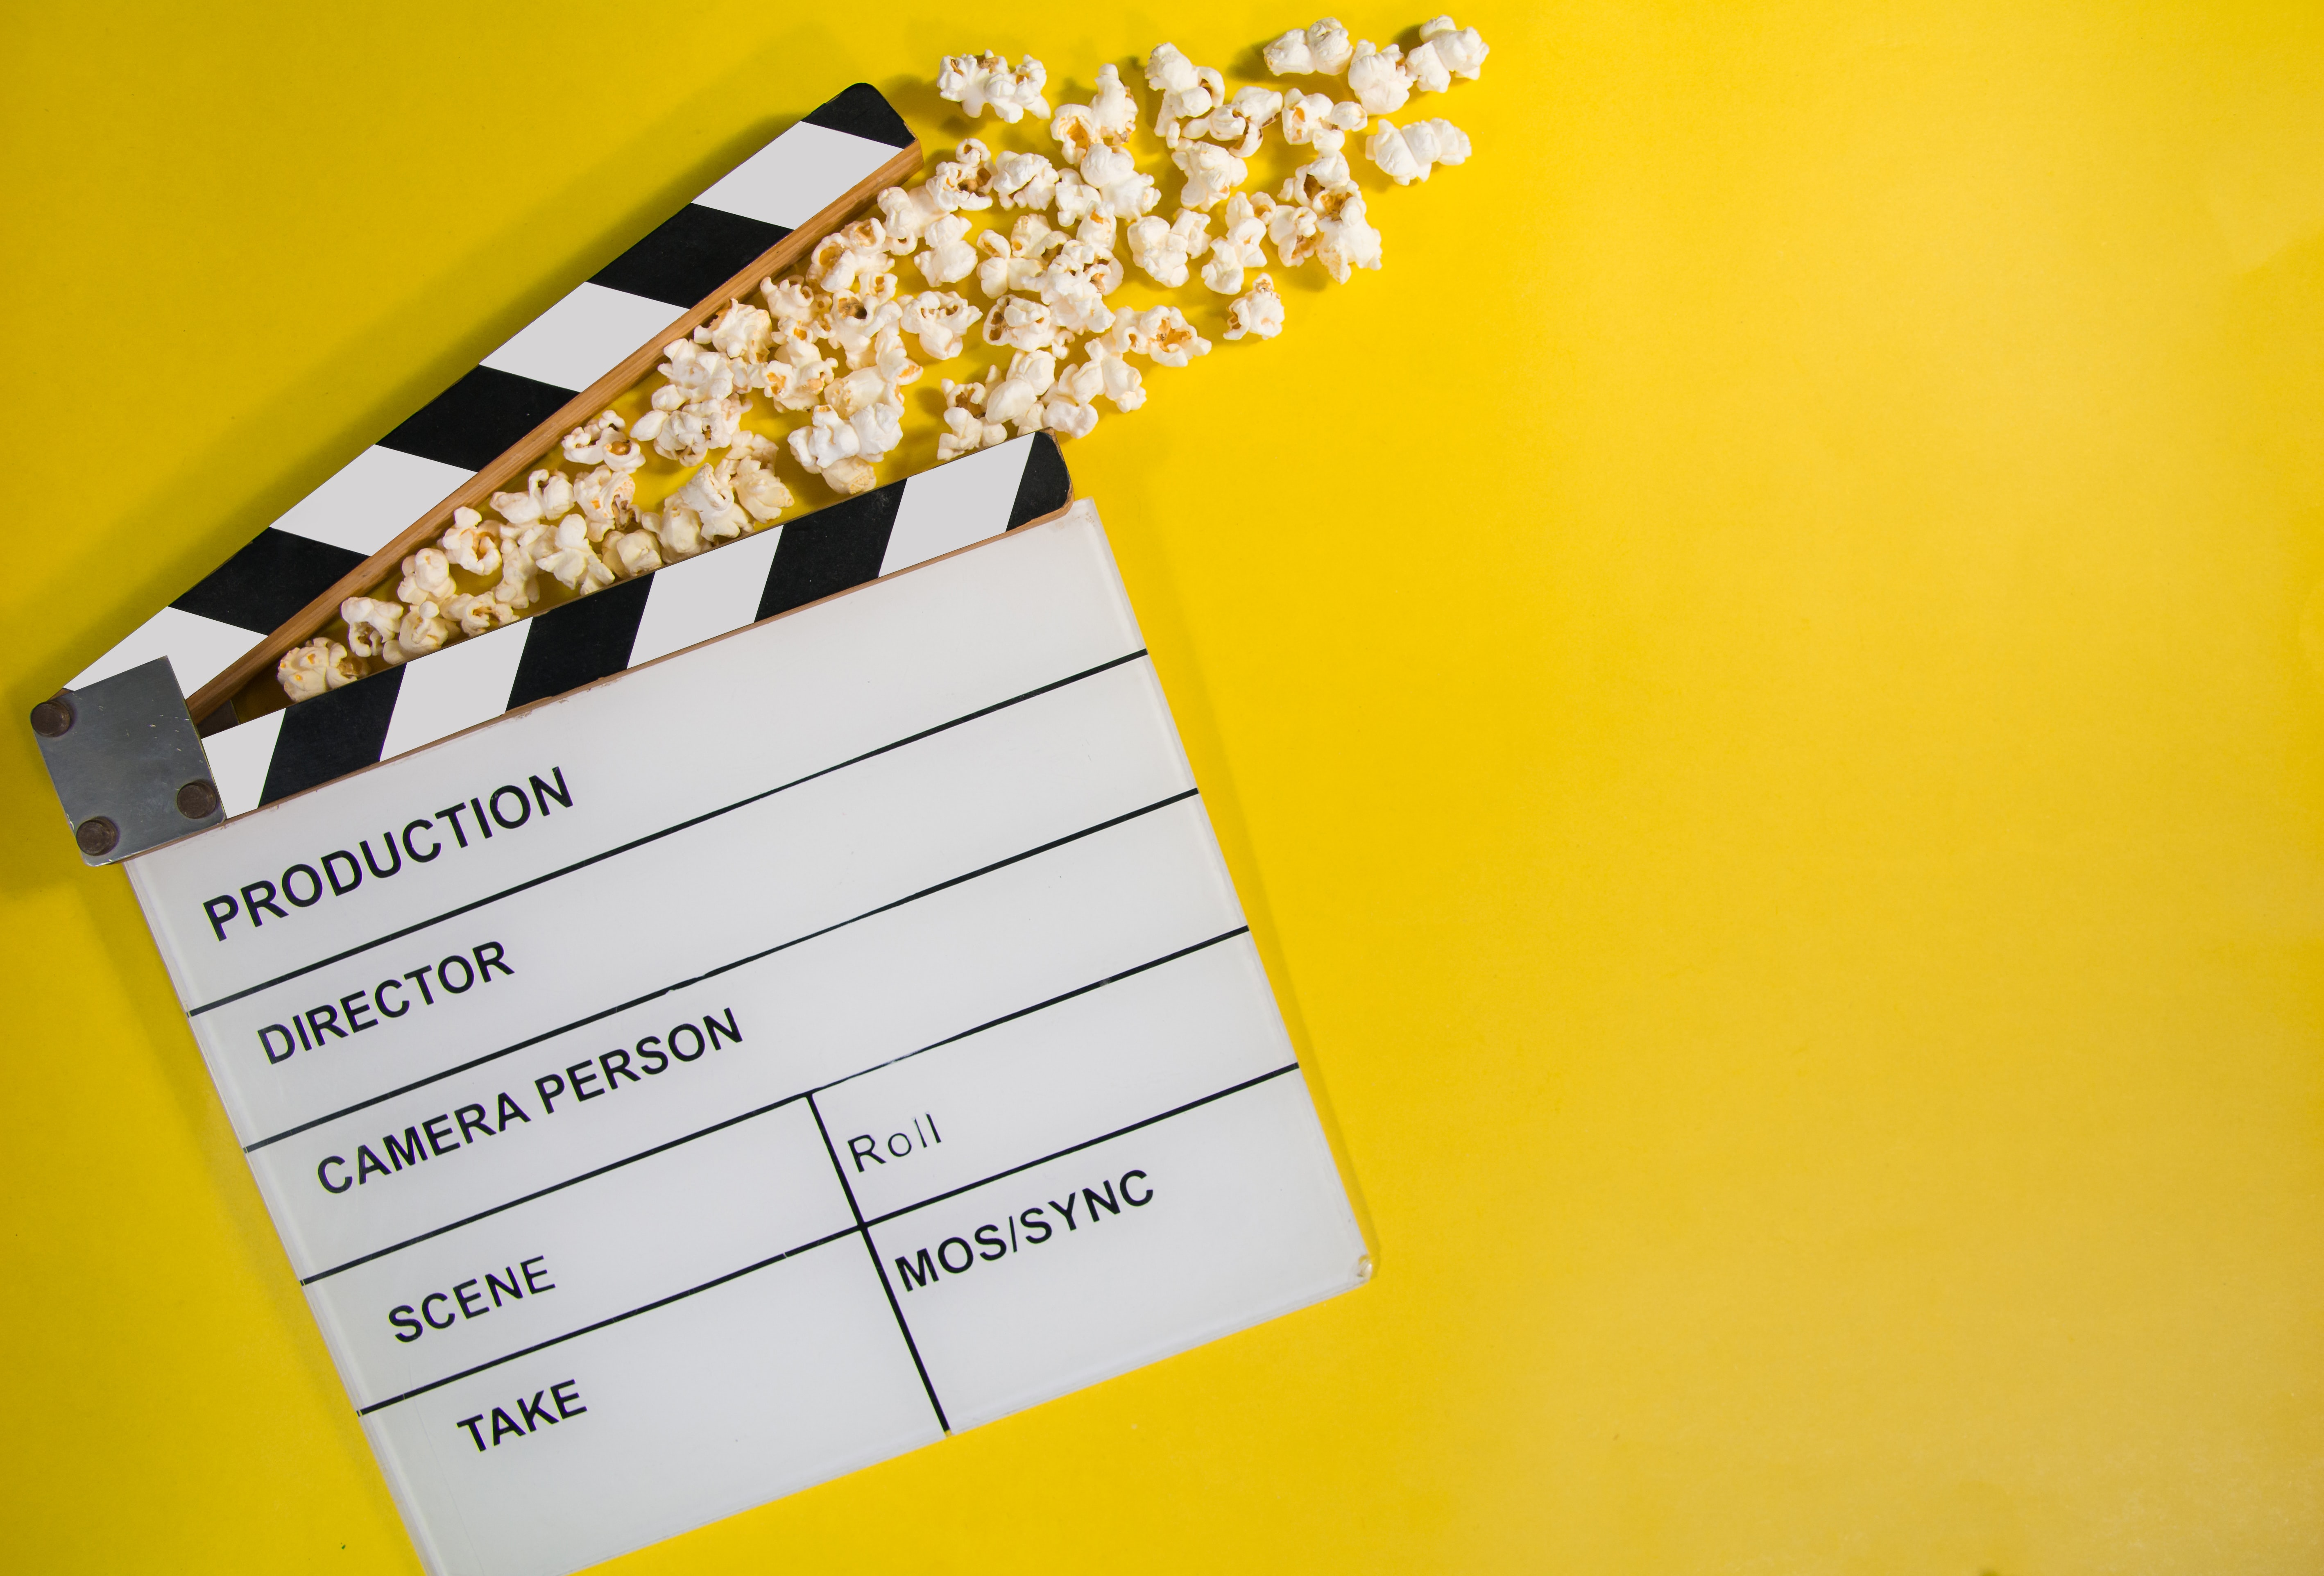

## Project Goal
***
My project aims to assist Microsoft in starting a movie studio. Through exploratory data analysis, I will offer insight to the head of the Microsoft movie studio on what movies are likely to be most successful. The measurement for success will be gross revenue, and I will examine key features such as production budget, genre, and director.

Using the data I provide, the head of the Microsoft studio will be able to make more informed decisions regarding what kind of movies the studio should focus on making.

## Table of Contents
- [The Data](#The-Data)
    - [Data Sources](#Data-Sources)
    - [Data Selection](#Data-Selection)
    - [Data Limitations](#Data-Limitations)
- [Data Preparation](#Data-Preparation)
    - [Revenue Data](#Revenue-Data)
        - [Box Office Mojo](#Box-Office-Mojo)
        - [The Numbers](#The-Numbers)
        - [Combining Revenue Datasets](#Combining-Revenue-Datasets)
            - [Fuzzy String Matching](#Fuzzy-String-Matching)
    - [IMDB Data](#IMDB-Data)
    - [Combining Revenue and IMDB Data](#Combining-Revenue-and-IMDB-Data)
- [Data Analysis](#Data-Analysis)
    - [Gross Revenue Correlation](#Gross-Revenue-Correlation)
    - [Genre Analysis](#Genre-Analysis)
        - [Genre Count](#Genre-Count)
        -[Individual Genres](#Individual-Genres)
    - [Director Analysis](#Director-Analysis)
- [Results](#Results)
    - [Recommendation](#Recommendation)
    - [Next Steps](#Next-Steps)

## The Data
***

### Data Sources

The data comes from three movie websites:

- [IMDB](https://www.imdb.com/): a SQLite database containing movies from 2010 to present. The main metrics I will be focusing on are genre and director.
- [Box Office Mojo](https://www.boxofficemojo.com/): a csv file with the domestic and foreign gross of movies from 2010 to 2018.
- [The Numbers](https://www.the-numbers.com/): a csv file containing the domestic gross, worldwide gross, and production budget of movies from 1915 to 2020.

### Data Selection

Given the data that is available from these 3 sources, I decided to focus only on movies from 2010 to 2018. These are the years for which the revenue and budget data is included.

### Data Limitations

The data does not include the most recent movie releases (2018-present). This would normally be a drawback, but given the ongoing global pandemic, which greatly shifted the movie and movie theater industry, the lack of recent data means that the analysis won't be skewed by the unprecedented changes that occured in recent years.

The other major limitation of the data is that it does not include information on movies released through streaming services. Given that the project goal is focused on helping Microsoft start a traditional movie studio, this won't be an issue. But ideally, any attempt by Microsoft to get into movie production would need to be informed by the recent rise of streaming platforms and direct-to-streaming movie releases.

## Data Preparation
***
### Revenue Data

First, I combine the revenue data from Box Office Mojo and The Numbers. This requires that I standardize the column names and data strings, as well as properly format the revenues into numerical data.

The biggest challenge in combining this data is the inconsistency of movie title formats, as it is different for all 3 data sources. I have no other consistent attribute to combine the data, so I will rely on fuzzy string matching to help combine the titles, which I describe in detail in the code below.

#### Box Office Mojo

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
box_office_mojo = pd.read_csv('zipped_data/bom.movie_gross.csv.gz')
box_office_mojo

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The null data in the domestic gross and foreign gross columns need to be examined and addressed.

In [4]:
box_office_mojo[box_office_mojo['domestic_gross'].isna() ==True]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


After looking into some of the entries, it seems that these foreign movies have their total gross listed as their foreign gross, so we will fill the NaN values in domestic gross with 0.

In [5]:
box_office_mojo['domestic_gross'] = box_office_mojo['domestic_gross'].fillna(0)

In [6]:
box_office_mojo[box_office_mojo['foreign_gross'].isna() ==True]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


There are a large number of entries with missing foreign gross data. The dataset is too large to drop, so for now it will be filled with a value of 0 so the column can be put in a numerical format. This means the total gross for these movies is artificially lowered, but this can be remedied when the data is combined with The Numbers data, which also has worldwide gross data.

In [7]:
# fill NaN values
# remove commas from foreign_gross strings
# change foreign_gross from string to float
box_office_mojo['foreign_gross'] = box_office_mojo['foreign_gross'].fillna('0').str.replace(',','').astype(float)

In [8]:
# combine domestic and foreign gross into total_gross
box_office_mojo['total_gross'] = box_office_mojo['foreign_gross'] + box_office_mojo['domestic_gross']
box_office_mojo['total_gross'] = round(box_office_mojo['total_gross']).astype('int64')

In [9]:
# drop unecessary columns
box_office_mojo.drop(['studio', 'domestic_gross', 'foreign_gross'], axis=1, inplace=True)

After examining some of the movie titles above, many include parentheticals related to the release date, foreign title, or the specfic version of the movie. These is not included in the other data sets, and will make it difficult to combine the data based on title, so I will drop the parentheticals. This means there may be some duplicate titles, but the year will still differ, allowing me to verify future merges.

In [10]:
# standardize the titles
box_office_mojo['title'] = box_office_mojo['title'].str.upper()
# examine all titles with parentheticals
box_office_mojo[box_office_mojo['title'].str.contains('\)$') == True]

,title,year,total_gross
1,ALICE IN WONDERLAND (2010),2010,1025500000
10,CLASH OF THE TITANS (2010),2010,493200000
55,A NIGHTMARE ON ELM STREET (2010),2010,115700000
63,AFTERSHOCK (TANGSHAN DADIZHEN),2010,100263000
79,IF YOU ARE THE ONE 2 (FEI CHENG WU RAO II),2010,76027000
...,...,...,...
3341,UNSTOPPABLE (2018),2018,101000
3365,THE APPARITION (2018),2018,28300
3378,HANNAH (2018),2018,11700
3380,FURIOUS (LEGEND OF KOLOVRAT),2018,10000


In [11]:
# remove parentheticals from the titles
box_office_mojo['title'] = box_office_mojo['title'].str.replace(r"\(.*\)$","").str.strip()

In [12]:
#check for duplicate titles
box_office_mojo[box_office_mojo['title'].duplicated(keep=False) == True]

,title,year,total_gross
12,THE KING'S SPEECH,2010,410900000
18,ROBIN HOOD,2010,321700000
43,UNSTOPPABLE,2010,167800000
61,THE GIRL WITH THE DRAGON TATTOO,2010,104400000
127,THE SECRET IN THEIR EYES,2010,34000000
129,LEAP YEAR,2010,32600000
211,FROZEN,2010,3146000
254,THE POLAR EXPRESS,2010,673000
276,THE GIRL ON THE TRAIN,2010,305100
317,BLUEBEARD,2010,38700


Some duplicate titles have different years, as expected. But some are from the same year. These appear to be duplicate entries/versions with slightly different grosses, so we will drop the duplicate with the lower total_gross.

In [13]:
# sort by total_gross, drop lower value duplicate, re-sort the data
box_office_mojo = box_office_mojo.sort_values(by='total_gross', ascending=False).drop_duplicates(['title', 'year']).sort_index()

In [14]:
box_office_mojo.reset_index(drop=True, inplace=True)

In [15]:
box_office_mojo

,title,year,total_gross
0,TOY STORY 3,2010,1067000000
1,ALICE IN WONDERLAND,2010,1025500000
2,HARRY POTTER AND THE DEATHLY HALLOWS PART 1,2010,960300000
3,INCEPTION,2010,828300000
4,SHREK FOREVER AFTER,2010,752600000
...,...,...,...
3378,THE QUAKE,2018,6200
3379,EDWARD II,2018,4800
3380,EL PACTO,2018,2500
3381,THE SWAN,2018,2400


In [16]:
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3383 non-null   object
 1   year         3383 non-null   int64 
 2   total_gross  3383 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 79.4+ KB


Now that the Box Office Mojo data is ready, we can prepare The Numbers data.

#### The Numbers

In [17]:
tn_movie_budgets = pd.read_csv('zipped_data/tn.movie_budgets.csv.gz')
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [18]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data has no NaN values, but the numeric columns are all strings. I also need to make sure the columns aren't using placeholder values instead of NaN.

In [19]:
# change release_date to a numeric value
tn_movie_budgets['release_date'] = tn_movie_budgets['release_date'].str[-4:].astype('int64')
# standardize the title column name for future merges
tn_movie_budgets = tn_movie_budgets.rename(columns={'movie': 'title'})

In [20]:
# limit data to the appropriate years
tn_movie_budgets = tn_movie_budgets[(tn_movie_budgets['release_date'] >= 2010) & (tn_movie_budgets['release_date'] <= 2018)]

In [21]:
# drop unnecessary columns and standardize titles
tn_movie_budgets.drop(['id', 'domestic_gross'], axis=1, inplace=True)
tn_movie_budgets['title'] = tn_movie_budgets['title'].str.upper()

In [22]:
tn_movie_budgets.reset_index(drop=True, inplace=True)

In [23]:
tn_movie_budgets

,release_date,title,production_budget,worldwide_gross
0,2011,PIRATES OF THE CARIBBEAN: ON STRANGER TIDES,"$410,600,000","$1,045,663,875"
1,2015,AVENGERS: AGE OF ULTRON,"$330,600,000","$1,403,013,963"
2,2017,STAR WARS EP. VIII: THE LAST JEDI,"$317,000,000","$1,316,721,747"
3,2015,STAR WARS EP. VII: THE FORCE AWAKENS,"$306,000,000","$2,053,311,220"
4,2018,AVENGERS: INFINITY WAR,"$300,000,000","$2,048,134,200"
...,...,...,...,...
2119,2014,STORIES OF OUR LIVES,"$15,000",$0
2120,2015,FAMILY MOTOCROSS,"$10,000",$0
2121,2012,NEWLYWEDS,"$9,000","$4,584"
2122,2018,RED 11,"$7,000",$0


In [24]:
# change monetary columns to numeric formats
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.strip('$').str.replace(',','').astype('int64')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.strip('$').str.replace(',','').astype('int64')

In [25]:
tn_movie_budgets.reset_index(drop=True, inplace=True)

In [26]:
tn_movie_budgets

,release_date,title,production_budget,worldwide_gross
0,2011,PIRATES OF THE CARIBBEAN: ON STRANGER TIDES,410600000,1045663875
1,2015,AVENGERS: AGE OF ULTRON,330600000,1403013963
2,2017,STAR WARS EP. VIII: THE LAST JEDI,317000000,1316721747
3,2015,STAR WARS EP. VII: THE FORCE AWAKENS,306000000,2053311220
4,2018,AVENGERS: INFINITY WAR,300000000,2048134200
...,...,...,...,...
2119,2014,STORIES OF OUR LIVES,15000,0
2120,2015,FAMILY MOTOCROSS,10000,0
2121,2012,NEWLYWEDS,9000,4584
2122,2018,RED 11,7000,0


In [27]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       2124 non-null   int64 
 1   title              2124 non-null   object
 2   production_budget  2124 non-null   int64 
 3   worldwide_gross    2124 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.5+ KB


#### Combining Revenue Datasets

Now that the Box Office Mojo and The Numbers datasets are prepared, I need to combine them. At first glance, the titles seem straightforward, but because of some differences in punctuation and encoding errors, further cleaning is needed. I will:

- clean the titles by removing encoding errors
- combine the two datasets by using fuzzy string matching

In [28]:
bom_titles = [row for row in box_office_mojo['title']]
bom_titles

['TOY STORY 3',
 'ALICE IN WONDERLAND',
 'HARRY POTTER AND THE DEATHLY HALLOWS PART 1',
 'INCEPTION',
 'SHREK FOREVER AFTER',
 'THE TWILIGHT SAGA: ECLIPSE',
 'IRON MAN 2',
 'TANGLED',
 'DESPICABLE ME',
 'HOW TO TRAIN YOUR DRAGON',
 'CLASH OF THE TITANS',
 'THE CHRONICLES OF NARNIA: THE VOYAGE OF THE DAWN TREADER',
 "THE KING'S SPEECH",
 'TRON LEGACY',
 'THE KARATE KID',
 'PRINCE OF PERSIA: THE SANDS OF TIME',
 'BLACK SWAN',
 'MEGAMIND',
 'ROBIN HOOD',
 'THE LAST AIRBENDER',
 'LITTLE FOCKERS',
 'RESIDENT EVIL: AFTERLIFE',
 'SHUTTER ISLAND',
 'SALT',
 'SEX AND THE CITY 2',
 'THE TOURIST',
 'THE EXPENDABLES',
 'GROWN UPS',
 'KNIGHT & DAY',
 'TRUE GRIT',
 "GULLIVER'S TRAVELS",
 'PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING THIEF',
 'THE SOCIAL NETWORK',
 "VALENTINE'S DAY",
 "THE SORCERER'S APPRENTICE",
 'DUE DATE',
 'EAT PRAY LOVE',
 'YOGI BEAR',
 'RED',
 'PARANORMAL ACTIVITY 2',
 'THE A-TEAM',
 'JACKASS 3-D',
 'THE OTHER GUYS',
 'UNSTOPPABLE',
 'STEP UP 3-D',
 'THE BOOK OF ELI',
 'THE TOW

In [29]:
tn_titles = [title for title in tn_movie_budgets['title']]
tn_titles

['PIRATES OF THE CARIBBEAN: ON STRANGER TIDES',
 'AVENGERS: AGE OF ULTRON',
 'STAR WARS EP. VIII: THE LAST JEDI',
 'STAR WARS EP. VII: THE FORCE AWAKENS',
 'AVENGERS: INFINITY WAR',
 'JUSTICE LEAGUE',
 'SPECTRE',
 'THE DARK KNIGHT RISES',
 'SOLO: A STAR WARS STORY',
 'THE LONE RANGER',
 'JOHN CARTER',
 'TANGLED',
 'CAPTAIN AMERICA: CIVIL WAR',
 'BATMAN V SUPERMAN: DAWN OF JUSTICE',
 'THE HOBBIT: AN UNEXPECTED JOURNEY',
 'THE HOBBIT: THE DESOLATION OF SMAUG',
 'THE HOBBIT: THE BATTLE OF THE FIVE ARMIES',
 'THE FATE OF THE FURIOUS',
 'PIRATES OF THE CARIBBEAN: DEAD MEN TELL NO TALES',
 'THE AVENGERS',
 'MAN OF STEEL',
 'THE AMAZING SPIDER-MAN',
 'BATTLESHIP',
 'TRANSFORMERS: THE LAST KNIGHT',
 'JURASSIC WORLD',
 'MEN IN BLACK 3',
 'TRANSFORMERS: AGE OF EXTINCTION',
 'ROBIN HOOD',
 'BLACK PANTHER',
 'INCREDIBLES 2',
 'ROGUE ONE: A STAR WARS STORY',
 'FINDING DORY',
 'TOY STORY 3',
 'IRON MAN 3',
 'GUARDIANS OF THE GALAXY VOL 2',
 'ALICE IN WONDERLAND',
 'SKYFALL',
 'MONSTERS UNIVERSITY',


A cursory glance at the list of titles from box_office_mojo shows they appear ready to merge.

Some of The Numbers titles, however, appear to have strange characters in them.

I will check for titles with strange characters, as defined by the string.printable constants in the [string](https://docs.python.org/3/library/string.html) package, and seperate them.

In [30]:
import string
import re

In [31]:
def check_for_strange_chars(strings_list):
    '''
    Will take a list of strings and check each character in each string.
    If any character is not in string.printable (a combination of digits, ascii_letters, punctuation, and whitespace),
    that string is added to the list strange_titles.
    Returns the strange_titles list.
    -
    Input: list of strings
    -
    Output: list of strings with non-standard characters
    '''
    strange_strings = []

    #check each character in each title string with nested for loop
    for title in strings_list:
        for char in title:
            # if char is not in string.printable, add it to the strange_tn_titles list
            if not char in string.printable:
                strange_strings.append(title)
                #prevent title from being added multiple times
                break
    return strange_strings

In [32]:
check_for_strange_chars(box_office_mojo['title'])

['QUÉ LEÓN', 'LOU ANDREAS-SALOMÉ, THE AUDACITY TO BE FREE']

In [33]:
check_for_strange_chars(tn_movie_budgets['title'])

['MISSION: IMPOSSIBLEÂ\x80\x94FALLOUT',
 'MISSION: IMPOSSIBLEÂ\x80\x94ROGUE NATION',
 'MISSION: IMPOSSIBLEÂ\x80\x94GHOST PROTOCOL',
 'ASSASSINÂ\x80\x99S CREED',
 'THE HUNTSMAN: WINTERÂ\x80\x99S WAR',
 'MISS PEREGRINEÂ\x80\x99S HOME FOR PECULIAR CHILDREN',
 'JIN LÃ\xadNG SHÃ\xad SAN CHAI',
 'ASTÃ©RIX ET OBÃ©LIX: AU SERVICE DE SA MAJESTÃ©',
 'DR. SEUSSÂ\x80\x99 THE GRINCH',
 'OCEANÂ\x80\x99S 8',
 'DADDYÂ\x80\x99S HOME 2',
 'LEGENDS OF OZ: DOROTHYÂ\x80\x99S RETURN',
 'PETEÂ\x80\x99S DRAGON',
 'WINTERÂ\x80\x99S TALE',
 'DADDYÂ\x80\x99S HOME',
 'THE GIRL IN THE SPIDERÂ\x80\x99S WEB',
 "POURQUOI J'AI PAS MANGÃ© MON PÃ¨RE",
 'BILLY LYNNÂ\x80\x99S LONG HALFTIME WALK',
 'UN MONSTRE Ã PARIS',
 'BRIDGET JONESÂ\x80\x99S BABY',
 'THE HITMANÂ\x80\x99S BODYGUARD',
 'MOLLYÂ\x80\x99S GAME',
 'RULES DONÂ\x80\x99T APPLY',
 'NEW YEARÂ\x80\x99S EVE',
 'A DOGÂ\x80\x99S PURPOSE',
 'MOTHERÂ\x80\x99S DAY',
 'LA VÃ©RITABLE HISTOIRE DU CHAT BOTTÃ©',
 'CHÄ\x81I DÃ\xa0N ZHUÄ\x81NJIÄ\x81',
 'TYLER PERRYÂ\x80\x99S B

Some foreign language characters and punctuation have their encoded values included in the titles above. I will focus on removing the puncuation errors:

In [34]:
# create dictionary with the replacement values for each string
tags = {'Â\x80\x99': "\'", 'Â\x80¦': '...', 'Â\x80\x94': '-', 'Â\x80\x93': ':', 'Ã©': 'e'}

In [35]:
# replace using the tags dictionary 
tn_movie_budgets['title'].replace(to_replace=tags, value=None, regex=True, inplace=True)

In [36]:
check_for_strange_chars(tn_movie_budgets['title'])

['JIN LÃ\xadNG SHÃ\xad SAN CHAI',
 "POURQUOI J'AI PAS MANGe MON PÃ¨RE",
 'UN MONSTRE Ã PARIS',
 'CHÄ\x81I DÃ\xa0N ZHUÄ\x81NJIÄ\x81',
 'JÃ¬YÃ¬ DÃ\xa0SHÄ«',
 'CÃ¬KÃ¨ NIÃ¨ YINNIÃ¡NG',
 'AUTÃ³MATA',
 'UN PROPHÃ¨TE',
 'JÃ»SAN-NIN NO SHIKAKU',
 "LA VIE D'ADÃ¨LE : CHAPITRES 1 & 2",
 'UTÃ¸YA 22. JULI',
 'ANTARCTIC EDGE: 70Âº SOUTH']

Given that the number of films remaining with non-standard characters is so small and consists mostly of smaller foreign films, I will leave them as is. They will be dropped when the data is merged later.

##### Fuzzy String Matching

For this, I will be using the FuzzyWuzzy package. A good explanation of the package can be found [here](https://www.datacamp.com/tutorial/fuzzy-string-python). Very simply, it uses Levenshtein distance to determine how similar two strings are. The danger of this method is false positives, so the year of each movie will be used to verify that the titles are indeed a match. If the titles seem to match, but the release year is different for each, no change will go into effect.

In order to limit the amount of titles that need to be checked, I will first find all the titles from each dataset that don't match on an inner join.

In [37]:
from fuzzywuzzy import fuzz

In [38]:
bom_unmatched = box_office_mojo.merge(tn_movie_budgets,
                                      on='title',
                                      how = 'outer',
                                      # limit results to Box Office Mojo movies that don't match
                                      indicator=True).loc[lambda x : x['_merge']=='left_only']
bom_unmatched

,title,year,total_gross,release_date,production_budget,worldwide_gross,_merge
2,HARRY POTTER AND THE DEATHLY HALLOWS PART 1,2010.0,960300000.0,NaN,NaN,NaN,left_only
14,TRON LEGACY,2010.0,400100000.0,NaN,NaN,NaN,left_only
16,PRINCE OF PERSIA: THE SANDS OF TIME,2010.0,336400000.0,NaN,NaN,NaN,left_only
32,KNIGHT & DAY,2010.0,261900000.0,NaN,NaN,NaN,left_only
45,JACKASS 3-D,2010.0,171700000.0,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...
3383,THE QUAKE,2018.0,6200.0,NaN,NaN,NaN,left_only
3384,EDWARD II,2018.0,4800.0,NaN,NaN,NaN,left_only
3385,EL PACTO,2018.0,2500.0,NaN,NaN,NaN,left_only
3386,THE SWAN,2018.0,2400.0,NaN,NaN,NaN,left_only


In [39]:
tn_unmatched = box_office_mojo.merge(tn_movie_budgets,
                                     on='title',
                                     how = 'outer',
                                     # limit results to The Numbers movies that don't match
                                     indicator=True).loc[lambda x : x['_merge']=='right_only']
tn_unmatched

,title,year,total_gross,release_date,production_budget,worldwide_gross,_merge
3388,STAR WARS EP. VIII: THE LAST JEDI,NaN,NaN,2017.0,317000000.0,1.316722e+09,right_only
3389,STAR WARS EP. VII: THE FORCE AWAKENS,NaN,NaN,2015.0,306000000.0,2.053311e+09,right_only
3390,THE AVENGERS,NaN,NaN,2012.0,225000000.0,1.517936e+09,right_only
3391,MEN IN BLACK 3,NaN,NaN,2012.0,215000000.0,6.542135e+08,right_only
3392,GUARDIANS OF THE GALAXY VOL 2,NaN,NaN,2017.0,200000000.0,8.623162e+08,right_only
...,...,...,...,...,...,...,...
4091,STORIES OF OUR LIVES,NaN,NaN,2014.0,15000.0,0.000000e+00,right_only
4092,FAMILY MOTOCROSS,NaN,NaN,2015.0,10000.0,0.000000e+00,right_only
4093,NEWLYWEDS,NaN,NaN,2012.0,9000.0,4.584000e+03,right_only
4094,RED 11,NaN,NaN,2018.0,7000.0,0.000000e+00,right_only


In [40]:
# (df_1, str_col_name_1, verif_col_name_1,
#  df_2, str_col_name_2, verif_col_name_2):

In [41]:
def fuzzy_string_match(df_1, df_2,
                       str_col_name_1, str_col_name_2,
                       verif_col_name_1=0, verif_col_name_2=0):
    '''
    Will take a single column from each dataframe with name 'str_col_name' and compare the strings.
    Will use an optional second column from each dataframe with name 'verif_col_name' and verify that the rows match.
    If no verification column is used, the function will apply all string matches.
    It is advisable to always use verification columns when possible to prevent false positive matches.
    Once a match has been made, replaces the string in df_2 with the string from df_1.
    -
    Input:
    
    df_1 = dataframe
    string_col_name_1 = the name of the df_1 column containing strings you wish to compare.
    verif_col_name_1 = optional parameter. the name of the df_1 column used to verify the string match.
                       the values in this column must be the same data type as the corresponding column in df_2
           
    df_2 = dataframe
    string_col_name_2 = the name of the df_2 column containing strings you wish to compare.
    verif_col_name_2 = optional parameter. the name of the df_2 column used to verify the string match.
                       the values in this column must be the same data type as the corresponding column in df_1
    -
    Output:
    
    Changes each matching string in df_2 with the corresponding string from df_1.
    Returns a message declaring the number of changes that have been made to df_2.
    '''
    # create two dataframes that contain the unmatched rows from each original dataframe 
    df_1_unmatched = df_1.merge(df_2,
                                on='title',
                                how = 'outer',
                                # limits the results to only df_1 rows that don't match
                                indicator=True).loc[lambda x : x['_merge']=='left_only']
    df_2_unmatched = df_1.merge(df_2,
                                on='title',
                                how = 'outer',
                                # limits the results to only df_2 rows that don't match
                                indicator=True).loc[lambda x : x['_merge']=='right_only']
    
    counter = 0
    
    # nested for loop compares the strings and verification values from each dataframe
    for str_1, verif_1 in zip(df_1_unmatched[str_col_name_1], df_1_unmatched[verif_col_name_1]):
        for str_2, verif_2 in zip(df_2_unmatched[str_col_name_2], df_2_unmatched[verif_col_name_2]):
            
            #score between 0 and 100. Higher score == closer match
            score = fuzz.ratio(str_1, str_2)
            
            if (score >= 85) & (verif_1 == verif_2):
                # replace the string in df_2 with the matching string from df_1 
                df_2[str_col_name_2].replace(str_2, str_1, inplace=True)
                counter += 1
    
    return print(f'{counter} changes made.')

In [42]:
# Examine the titles from each dataframe. Use the release_date and year columns to verify the match.
fuzzy_string_match(tn_movie_budgets, box_office_mojo,
                   'title', 'title',
                   'release_date', 'year')

52 changes made.


In [43]:
rev_data = box_office_mojo.merge(tn_movie_budgets, on='title', how = 'inner')
rev_data

,title,year,total_gross,release_date,production_budget,worldwide_gross
0,TOY STORY 3,2010,1067000000,2010,200000000,1068879522
1,ALICE IN WONDERLAND,2010,1025500000,2010,200000000,1025491110
2,HARRY POTTER AND THE DEATHLY HALLOWS: PART I,2010,960300000,2010,125000000,960431568
3,INCEPTION,2010,828300000,2010,160000000,835524642
4,SHREK FOREVER AFTER,2010,752600000,2010,165000000,756244673
...,...,...,...,...,...,...
1480,BEN IS BACK,2018,3700000,2018,13000000,9633111
1481,BILAL: A NEW BREED OF HERO,2018,2191000,2018,30000000,648599
1482,MANDY,2018,1200000,2018,6000000,1427656
1483,LEAN ON PETE,2018,1200000,2018,8000000,2455027


In [44]:
rev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1484
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1485 non-null   object
 1   year               1485 non-null   int64 
 2   total_gross        1485 non-null   int64 
 3   release_date       1485 non-null   int64 
 4   production_budget  1485 non-null   int64 
 5   worldwide_gross    1485 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 81.2+ KB


In [45]:
rev_data.describe()

,year,total_gross,release_date,production_budget,worldwide_gross
count,1485.000000,1.485000e+03,1485.000000,1.485000e+03,1.485000e+03
mean,2013.633670,1.505300e+08,2013.637710,4.822257e+07,1.571312e+08
std,2.552774,2.241053e+08,2.548596,5.581190e+07,2.429571e+08
min,2010.000000,1.200000e+03,2010.000000,2.700000e+04,0.000000e+00
25%,2011.000000,1.590000e+07,2011.000000,1.000000e+07,1.872630e+07
50%,2014.000000,6.380000e+07,2014.000000,2.800000e+07,6.534369e+07
75%,2016.000000,1.766000e+08,2016.000000,6.000000e+07,1.758638e+08
max,2018.000000,1.405400e+09,2018.000000,4.106000e+08,2.053311e+09


In [46]:
#set worldwide gross to the highest of the 2 gross values
rev_data.loc[(rev_data['total_gross'] >= rev_data['worldwide_gross']), 'worldwide_gross'] = rev_data['total_gross']

In [47]:
# remove redundant columns, set appropriate data types
rev_data.drop(['release_date', 'total_gross'], axis=1, inplace=True)
rev_data['year'] = rev_data['year'].astype('int64')
rev_data['worldwide_gross'] = rev_data['worldwide_gross'].astype('int64')

In [48]:
rev_data

,title,year,production_budget,worldwide_gross
0,TOY STORY 3,2010,200000000,1068879522
1,ALICE IN WONDERLAND,2010,200000000,1025500000
2,HARRY POTTER AND THE DEATHLY HALLOWS: PART I,2010,125000000,960431568
3,INCEPTION,2010,160000000,835524642
4,SHREK FOREVER AFTER,2010,165000000,756244673
...,...,...,...,...
1480,BEN IS BACK,2018,13000000,9633111
1481,BILAL: A NEW BREED OF HERO,2018,30000000,2191000
1482,MANDY,2018,6000000,1427656
1483,LEAN ON PETE,2018,8000000,2455027


### IMDB Data

For the IMDB data, I will query all movies from 2010-2018. I also use a JOIN subquery to add a column that includes the total number of movies that the director has directed as of the date of data collection.

In [49]:
import zipfile
# unzip imdb database file before accessing
with zipfile.ZipFile('zipped_data/im.db.zip', 'r') as zp:
    zp.extractall("zipped_data")

In [50]:
import sqlite3

conn = sqlite3.connect('zipped_data/im.db')

In [51]:
# all movies from 2010-2018
q = """
SELECT movie_id,
       primary_title AS title,
       original_title,
       start_year AS year,
       runtime_minutes AS runtime,
       genres,
       averagerating AS avg_rating,
       numvotes AS num_votes
FROM directors
JOIN movie_ratings
 USING (movie_id)
JOIN movie_basics
 USING (movie_id)
WHERE start_year BETWEEN 2010 and 2018
GROUP BY movie_id
ORDER BY start_year
;
"""
raw_data = pd.read_sql(q, conn)
raw_data

,movie_id,title,original_title,year,runtime,genres,avg_rating,num_votes
0,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
1,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
2,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
3,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8
4,tt0312305,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi",5.1,287
...,...,...,...,...,...,...,...,...
70939,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",6.2,6
70940,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5
70941,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5
70942,tt9904014,Lost in Klessin,Lost in Klessin,2018,90.0,War,7.3,12


In [52]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        70944 non-null  object 
 1   title           70944 non-null  object 
 2   original_title  70944 non-null  object 
 3   year            70944 non-null  int64  
 4   runtime         63965 non-null  float64
 5   genres          70292 non-null  object 
 6   avg_rating      70944 non-null  float64
 7   num_votes       70944 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.3+ MB


Since I will be using genre as a key attribute in our analysis, I will drop movies without genre data (652 entries).

In [53]:
q = """
SELECT movie_id,
       primary_title AS title,
       original_title,
       start_year AS year,
       runtime_minutes AS runtime,
       genres,
       averagerating AS avg_rating,
       numvotes AS num_votes,
       person_id,
       primary_name as director,
       num_movies_directed
FROM directors
JOIN movie_ratings
 USING (movie_id)
JOIN movie_basics
 USING (movie_id)
JOIN persons
 USING (person_id)
/* add director and the total number of movies they have directed */
JOIN (SELECT person_id, COUNT(DISTINCT movie_id) AS num_movies_directed
      FROM directors
      JOIN movie_basics
       USING (movie_id)
      GROUP BY person_id)
 USING (person_id)
WHERE (start_year BETWEEN 2010 and 2018) &
      (genres IS NOT NULL)
GROUP BY movie_id
ORDER BY start_year
;
"""
imdb_df = pd.read_sql(q, conn)
imdb_df

,movie_id,title,original_title,year,runtime,genres,avg_rating,num_votes,person_id,director,num_movies_directed
0,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,nm1030585,Ágnes Kocsis,2
1,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64,nm0417352,Miklós Jancsó,2
2,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120,nm1207262,Bence Miklauzic,2
3,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8,nm0011276,R.J. Adams,1
4,tt0312305,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi",5.1,287,nm0820800,Daniel St. Pierre,2
...,...,...,...,...,...,...,...,...,...,...,...
70286,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",6.2,6,nm4159008,Afshin Hashemi,4
70287,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5,nm5971240,Hatef Alimardani,7
70288,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,nm10532891,Loco Meisenkaiser,1
70289,tt9904014,Lost in Klessin,Lost in Klessin,2018,90.0,War,7.3,12,nm6960704,Heintje Peter,2


In [54]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70291 entries, 0 to 70290
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             70291 non-null  object 
 1   title                70291 non-null  object 
 2   original_title       70291 non-null  object 
 3   year                 70291 non-null  int64  
 4   runtime              63515 non-null  float64
 5   genres               70291 non-null  object 
 6   avg_rating           70291 non-null  float64
 7   num_votes            70291 non-null  int64  
 8   person_id            70291 non-null  object 
 9   director             70291 non-null  object 
 10  num_movies_directed  70291 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.9+ MB


In [55]:
imdb_df.describe()

,year,runtime,avg_rating,num_votes,num_movies_directed
count,70291.000000,63515.000000,70291.000000,7.029100e+04,70291.000000
mean,2014.138154,94.582807,6.316930,3.657801e+03,3.103072
std,2.519779,212.915352,1.469484,3.095943e+04,3.760197
min,2010.000000,3.000000,1.000000,5.000000e+00,1.000000
25%,2012.000000,81.000000,5.400000,1.400000e+01,1.000000
50%,2014.000000,91.000000,6.500000,5.200000e+01,2.000000
75%,2016.000000,104.000000,7.300000,3.000000e+02,4.000000
max,2018.000000,51420.000000,10.000000,1.841066e+06,51.000000


In [56]:
# standardize titles
imdb_df['title'] = imdb_df['title'].str.upper()
imdb_df['original_title'] = imdb_df['original_title'].str.upper()

### Combining Revenue and IMDB Data

The IMDB dataset has a primary title and original title for each movie, so I will do two seperate merges (one for each column), then concatenate the results and remove the duplicates.

In [57]:
# merge using imdb 'title'
merge_1 = imdb_df.merge(rev_data, on=['title', 'year'])
merge_1

,movie_id,title,original_title,year,runtime,genres,avg_rating,num_votes,person_id,director,num_movies_directed,production_budget,worldwide_gross
0,tt0398286,TANGLED,TANGLED,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,nm0397174,Byron Howard,2,260000000,591800000
1,tt0427152,DINNER FOR SCHMUCKS,DINNER FOR SCHMUCKS,2010,114.0,Comedy,5.9,91546,nm0005366,Jay Roach,4,69000000,86800000
2,tt0429493,THE A-TEAM,THE A-TEAM,2010,117.0,"Action,Adventure,Thriller",6.8,235256,nm0138620,Joe Carnahan,4,110000000,177241171
3,tt0435761,TOY STORY 3,TOY STORY 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,3,200000000,1068879522
4,tt0446029,SCOTT PILGRIM VS. THE WORLD,SCOTT PILGRIM VS. THE WORLD,2010,112.0,"Action,Comedy,Fantasy",7.5,339338,nm0942367,Edgar Wright,3,85000000,48056764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,tt7690670,SUPERFLY,SUPERFLY,2018,116.0,"Action,Crime,Thriller",5.0,4753,nm1962311,Director X.,2,16000000,20736000
1262,tt7784604,HEREDITARY,HEREDITARY,2018,127.0,"Drama,Horror,Mystery",7.3,151571,nm4170048,Ari Aster,2,10000000,79400000
1263,tt7959026,THE MULE,THE MULE,2018,116.0,"Crime,Drama,Thriller",7.1,58955,nm0000142,Clint Eastwood,7,50000000,172500000
1264,tt8097306,NOBODY'S FOOL,NOBODY'S FOOL,2018,110.0,"Comedy,Drama,Romance",4.6,3618,nm1347153,Tyler Perry,17,19000000,33500000


In [58]:
# merge using imdb 'original_title'
merge_2 = imdb_df.merge(rev_data, left_on=['original_title', 'year'], right_on=['title', 'year'])
merge_2

,movie_id,title_x,original_title,year,runtime,genres,avg_rating,num_votes,person_id,director,num_movies_directed,title_y,production_budget,worldwide_gross
0,tt0398286,TANGLED,TANGLED,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,nm0397174,Byron Howard,2,TANGLED,260000000,591800000
1,tt0427152,DINNER FOR SCHMUCKS,DINNER FOR SCHMUCKS,2010,114.0,Comedy,5.9,91546,nm0005366,Jay Roach,4,DINNER FOR SCHMUCKS,69000000,86800000
2,tt0429493,THE A-TEAM,THE A-TEAM,2010,117.0,"Action,Adventure,Thriller",6.8,235256,nm0138620,Joe Carnahan,4,THE A-TEAM,110000000,177241171
3,tt0435761,TOY STORY 3,TOY STORY 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,3,TOY STORY 3,200000000,1068879522
4,tt0446029,SCOTT PILGRIM VS. THE WORLD,SCOTT PILGRIM VS. THE WORLD,2010,112.0,"Action,Comedy,Fantasy",7.5,339338,nm0942367,Edgar Wright,3,SCOTT PILGRIM VS. THE WORLD,85000000,48056764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,tt7545524,BEN IS BACK,BEN IS BACK,2018,103.0,Drama,6.7,10402,nm0373282,Peter Hedges,2,BEN IS BACK,13000000,9633111
1241,tt7690670,SUPERFLY,SUPERFLY,2018,116.0,"Action,Crime,Thriller",5.0,4753,nm1962311,Director X.,2,SUPERFLY,16000000,20736000
1242,tt7784604,HEREDITARY,HEREDITARY,2018,127.0,"Drama,Horror,Mystery",7.3,151571,nm4170048,Ari Aster,2,HEREDITARY,10000000,79400000
1243,tt7959026,THE MULE,THE MULE,2018,116.0,"Crime,Drama,Thriller",7.1,58955,nm0000142,Clint Eastwood,7,THE MULE,50000000,172500000


In [59]:
movie_data = pd.concat([merge_1, merge_2])

In [60]:
# put all titles into single column
movie_data['title'] = movie_data['title'].fillna(movie_data['title_x'])
# drop unecessary columns
movie_data = movie_data.drop(['original_title', 'title_x', 'title_y'], axis=1)

In [61]:
movie_data = movie_data.drop_duplicates().reset_index(drop=True)

In [62]:
# add feature for ROI
movie_data['ROI'] = movie_data['worldwide_gross'] - movie_data['production_budget']
movie_data

,movie_id,title,year,runtime,genres,avg_rating,num_votes,person_id,director,num_movies_directed,production_budget,worldwide_gross,ROI
0,tt0398286,TANGLED,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,nm0397174,Byron Howard,2,260000000,591800000,331800000
1,tt0427152,DINNER FOR SCHMUCKS,2010,114.0,Comedy,5.9,91546,nm0005366,Jay Roach,4,69000000,86800000,17800000
2,tt0429493,THE A-TEAM,2010,117.0,"Action,Adventure,Thriller",6.8,235256,nm0138620,Joe Carnahan,4,110000000,177241171,67241171
3,tt0435761,TOY STORY 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,3,200000000,1068879522,868879522
4,tt0446029,SCOTT PILGRIM VS. THE WORLD,2010,112.0,"Action,Comedy,Fantasy",7.5,339338,nm0942367,Edgar Wright,3,85000000,48056764,-36943236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,tt1477076,SAW 3D: THE FINAL CHAPTER,2010,90.0,"Crime,Horror,Mystery",5.6,83532,nm0340436,Kevin Greutert,4,17000000,136100000,119100000
1267,tt3381068,GNOME ALONE,2015,94.0,Horror,3.5,303,nm1914394,Timothy Woodward Jr.,15,25000000,43000000,18000000
1268,tt3833746,THE VISIT: AN ALIEN ENCOUNTER,2015,83.0,Documentary,6.0,661,nm1378517,Michael Madsen,4,5000000,98677816,93677816
1269,tt6217804,BOO 2! A MADEA HALLOWEEN,2017,101.0,"Comedy,Drama,Horror",3.8,3383,nm1347153,Tyler Perry,17,20000000,48300000,28300000


## Data Analysis
***
Now that I have a prepared dataset, I will:

- examine features that correlate with gross revenue
- perform genre analysis
- examine director experience as a possible metric

In [63]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             1271 non-null   object 
 1   title                1271 non-null   object 
 2   year                 1271 non-null   int64  
 3   runtime              1269 non-null   float64
 4   genres               1271 non-null   object 
 5   avg_rating           1271 non-null   float64
 6   num_votes            1271 non-null   int64  
 7   person_id            1271 non-null   object 
 8   director             1271 non-null   object 
 9   num_movies_directed  1271 non-null   int64  
 10  production_budget    1271 non-null   int64  
 11  worldwide_gross      1271 non-null   int64  
 12  ROI                  1271 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 129.2+ KB


In [64]:
movie_data.describe()

,year,runtime,avg_rating,num_votes,num_movies_directed,production_budget,worldwide_gross,ROI
count,1271.000000,1269.000000,1271.000000,1.271000e+03,1271.000000,1.271000e+03,1.271000e+03,1.271000e+03
mean,2013.763179,109.738377,6.434933,1.362959e+05,3.649095,5.162546e+07,1.699728e+08,1.183474e+08
std,2.552707,17.661984,0.937138,1.681537e+05,2.339913,5.717314e+07,2.455546e+08,2.045240e+08
min,2010.000000,25.000000,1.600000,5.000000e+00,1.000000,2.700000e+04,3.600000e+03,-1.104502e+08
25%,2011.000000,97.000000,5.900000,3.437500e+04,2.000000,1.300000e+07,2.662724e+07,6.527267e+06
50%,2014.000000,107.000000,6.500000,8.157500e+04,3.000000,3.000000e+07,7.773592e+07,4.290000e+07
75%,2016.000000,119.000000,7.100000,1.706100e+05,5.000000,6.500000e+07,2.024977e+08,1.344500e+08
max,2018.000000,180.000000,8.800000,1.841066e+06,23.000000,4.106000e+08,2.048134e+09,1.748134e+09


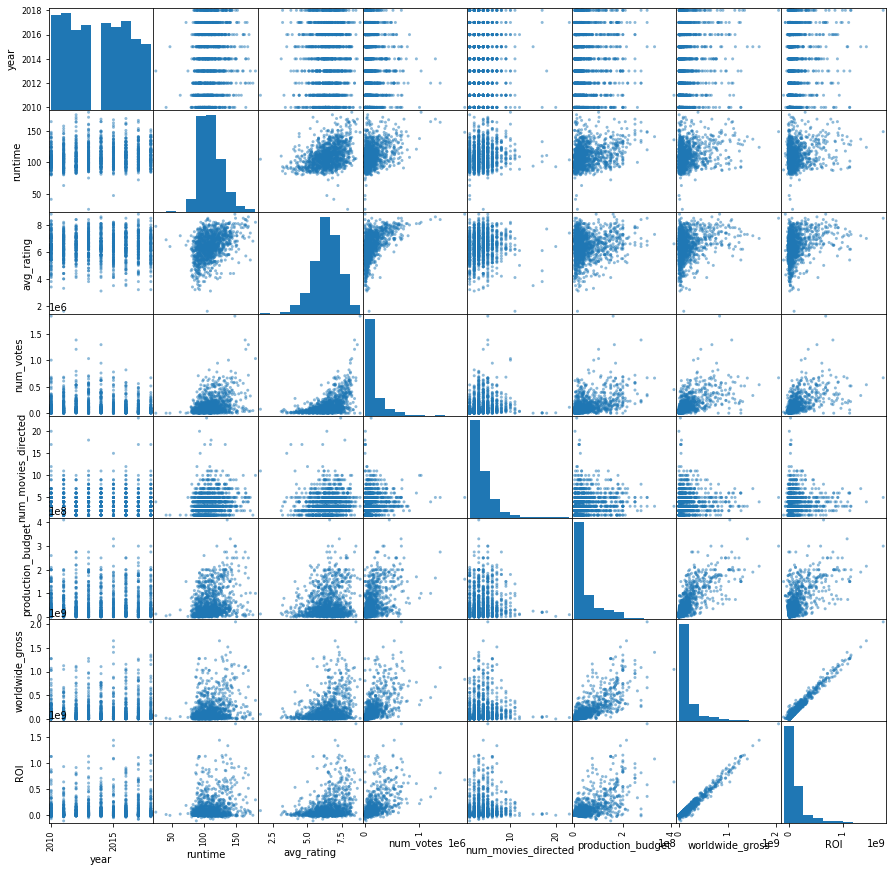

In [65]:
pd.plotting.scatter_matrix(movie_data, figsize=(15,15));

ROI appears to be a less useful metric. Since worldwide gross correlates with the ROI so closely, it will be better to use gross revenue as our main metric. This is also better because I don't have data on movie costs other than production budget (distribution, marketing, etc.)

### Gross Revenue Correlation

In [66]:
movie_data.corr()

,year,runtime,avg_rating,num_votes,num_movies_directed,production_budget,worldwide_gross,ROI
year,1.000000,0.122662,0.012940,-0.109004,0.007696,0.046440,0.088963,0.093829
runtime,0.122662,1.000000,0.395251,0.394900,0.158300,0.320832,0.267327,0.231320
avg_rating,0.012940,0.395251,1.000000,0.508435,0.072743,0.153905,0.260492,0.269728
num_votes,-0.109004,0.394900,0.508435,1.000000,0.130849,0.502585,0.600293,0.580228
num_movies_directed,0.007696,0.158300,0.072743,0.130849,1.000000,0.082035,0.090193,0.085355
production_budget,0.046440,0.320832,0.153905,0.502585,0.082035,1.000000,0.774115,0.649871
worldwide_gross,0.088963,0.267327,0.260492,0.600293,0.090193,0.774115,1.000000,0.984217
ROI,0.093829,0.231320,0.269728,0.580228,0.085355,0.649871,0.984217,1.000000


The 2 strongest correlations to worldwide gross are:

- Production Budget: r = .774
- Number of Votes: r = .600

I will perform linear regression to examine the relationships more closely.

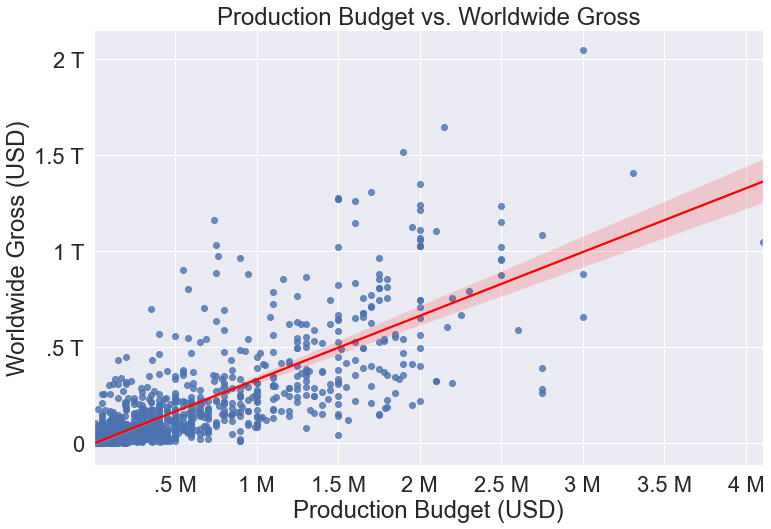

In [67]:
sns.set_style("darkgrid")
sns.set(font_scale = 2)

plt.figure(figsize = (12,8))

budget_reg = sns.regplot(data=movie_data, x='production_budget', y='worldwide_gross', line_kws={'color':'red'})

budget_reg.set(xlabel='Production Budget (USD)',
               ylabel='Worldwide Gross (USD)',
               title='Production Budget vs. Worldwide Gross')

# must manually set ticks before labeling to prevent display errors
budget_reg.set_xticks(budget_reg.get_xticks()[:-1])
budget_reg.set_xticklabels(['', '.5 M', '1 M', '1.5 M', '2 M', '2.5 M', '3 M', '3.5 M', '4 M'])

budget_reg.set_yticks(budget_reg.get_yticks()[1:-1])
budget_reg.set_yticklabels(['0', '.5 T', '1 T', '1.5 T', '2 T'])
plt.savefig('budget_reg.png', bbox_inches='tight');

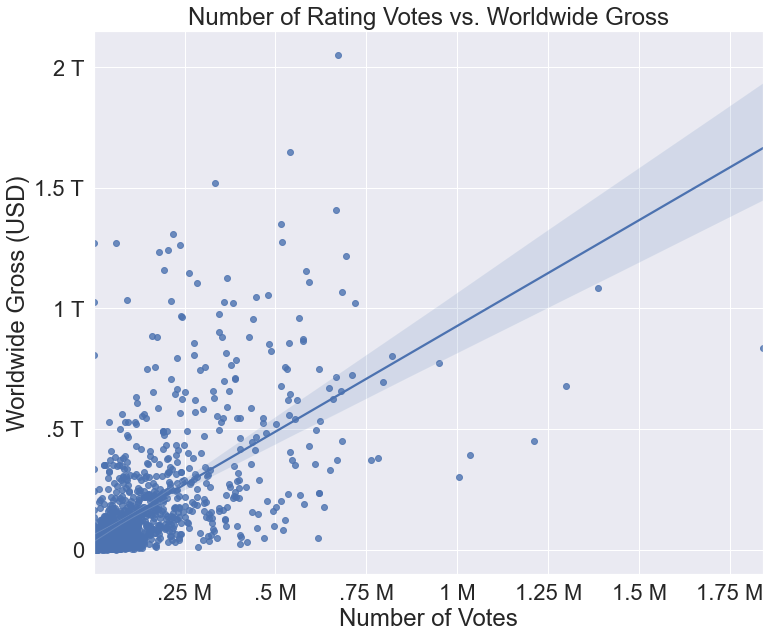

In [68]:
plt.figure(figsize = (12,10))

votes_reg = sns.regplot(data=movie_data, x='num_votes', y='worldwide_gross')

votes_reg.set(xlabel='Number of Votes',
              ylabel='Worldwide Gross (USD)',
              title='Number of Rating Votes vs. Worldwide Gross')

# must manually set ticks before labeling to prevent display errors
votes_reg.set_xticks(votes_reg.get_xticks()[:-1])
votes_reg.set_xticklabels(['', '.25 M', '.5 M', '.75 M', '1 M', '1.25 M', '1.5 M', '1.75 M'])

votes_reg.set_yticks(votes_reg.get_yticks()[1:-1])
votes_reg.set_yticklabels(['0', '.5 T', '1 T', '1.5 T', '2 T']);

Number of votes does not correlate strongly enough with revenue to warrant further analysis, but production budget is able to provide at least a rough indication of how profitable a movie might be.

### Genre Analysis

I will now use the dataset to analyze the features based on movie genre. The genres column includes up to three genres for each movie, so I will need to seperate them. I will:

- create dummy variables for each genre
- analyze features by a movies total genre count
- analyze features by individual genre

In [69]:
# split genre values into indivual dummy variables
genre_data = movie_data['genres'].str.get_dummies(',')
# add column for total number of genres for each movie
genre_data['genre_count'] = sum([genre_data[genre] for genre in genre_data])
genre_data

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,genre_count
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1268,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1269,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [70]:
# add dummy variables to the dataset
full_movie_data = movie_data.merge(genre_data, left_index=True, right_index=True)
full_movie_data

,movie_id,title,year,runtime,genres,avg_rating,num_votes,person_id,director,num_movies_directed,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,genre_count
0,tt0398286,TANGLED,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,nm0397174,Byron Howard,2,...,0,0,0,0,0,0,0,0,0,3
1,tt0427152,DINNER FOR SCHMUCKS,2010,114.0,Comedy,5.9,91546,nm0005366,Jay Roach,4,...,0,0,0,0,0,0,0,0,0,1
2,tt0429493,THE A-TEAM,2010,117.0,"Action,Adventure,Thriller",6.8,235256,nm0138620,Joe Carnahan,4,...,0,0,0,0,0,0,1,0,0,3
3,tt0435761,TOY STORY 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,3,...,0,0,0,0,0,0,0,0,0,3
4,tt0446029,SCOTT PILGRIM VS. THE WORLD,2010,112.0,"Action,Comedy,Fantasy",7.5,339338,nm0942367,Edgar Wright,3,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,tt1477076,SAW 3D: THE FINAL CHAPTER,2010,90.0,"Crime,Horror,Mystery",5.6,83532,nm0340436,Kevin Greutert,4,...,0,0,1,0,0,0,0,0,0,3
1267,tt3381068,GNOME ALONE,2015,94.0,Horror,3.5,303,nm1914394,Timothy Woodward Jr.,15,...,0,0,0,0,0,0,0,0,0,1
1268,tt3833746,THE VISIT: AN ALIEN ENCOUNTER,2015,83.0,Documentary,6.0,661,nm1378517,Michael Madsen,4,...,0,0,0,0,0,0,0,0,0,1
1269,tt6217804,BOO 2! A MADEA HALLOWEEN,2017,101.0,"Comedy,Drama,Horror",3.8,3383,nm1347153,Tyler Perry,17,...,0,0,0,0,0,0,0,0,0,3


#### Genre Count

In [71]:
# examine key features based on genre count
key_features = ['avg_rating', 'worldwide_gross', 'genre_count']
full_movie_data[key_features].groupby('genre_count').describe().T

genre_count                       1             2             3
avg_rating      count  1.050000e+02  2.850000e+02  8.810000e+02
                mean   6.300000e+00  6.391228e+00  6.465153e+00
                std    1.050458e+00  9.759937e-01  9.087955e-01
                min    3.300000e+00  1.600000e+00  3.100000e+00
                25%    5.700000e+00  5.800000e+00  5.900000e+00
                50%    6.300000e+00  6.400000e+00  6.500000e+00
                75%    6.900000e+00  7.100000e+00  7.100000e+00
                max    8.800000e+00  8.500000e+00  8.800000e+00
worldwide_gross count  1.050000e+02  2.850000e+02  8.810000e+02
                mean   7.584806e+07  1.033209e+08  2.027525e+08
                std    1.032103e+08  1.645204e+08  2.710238e+08
                min    3.600000e+03  1.180000e+04  2.280000e+04
                25%    1.129532e+07  1.972020e+07  3.482034e+07
                50%    4.300000e+07  5.340194e+07  9.540000e+07
                75%    1.018000e+08  1.155921e+08  2.495180e+08
                max    8.071000e+08  1.272470e+09  2.048134e+09

Rating does not appear to be significantly different based on genre count. Worldwide gross, however, does appear to increase as genre count increases. I will plot the data to get a closer look.

The boxplot is illegible when outliers are included due to the fact that there are so many large revenue values, so I will omit them from the graph. However, I wish to still provide visual information that indicates the existence of these high value datapoints. I will do this by including the mean of each category, since the mean is more affected by the large outliers than the median value is. The difference between the mean and median will indicate the relative weight of the missing outliers.

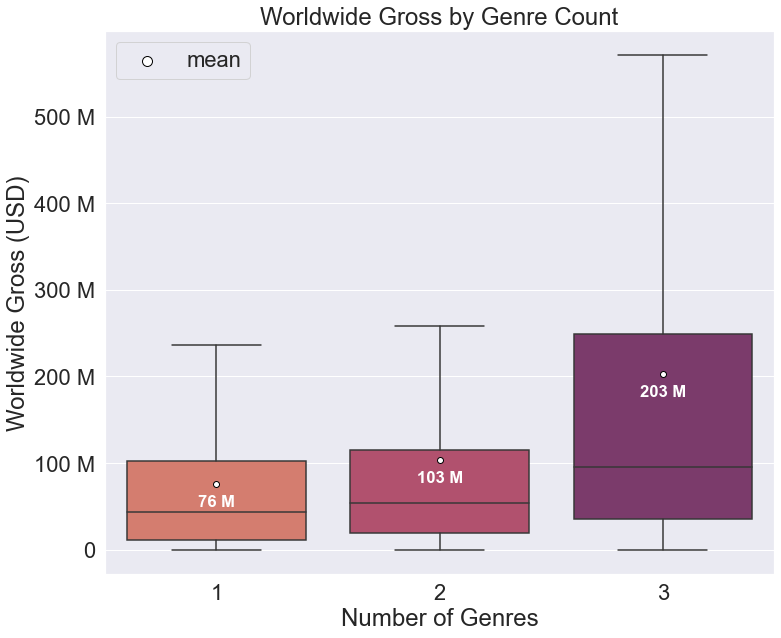

In [72]:
plt.figure(figsize = (12,10))

genre_count_graph = sns.boxplot(data=full_movie_data,
                                x='genre_count',
                                y='worldwide_gross',
                                palette='flare',
                                # omit outliers
                                showfliers=False,
                                # include means
                                showmeans=True,
                                meanprops={"marker":"o", "markerfacecolor":"white", 'markeredgecolor':'black'})

genre_count_graph.set(xlabel='Number of Genres',
                      ylabel='Worldwide Gross (USD)',
                      title='Worldwide Gross by Genre Count')

# manually set ticks before labeling to prevent display errors
genre_count_graph.set_yticks(genre_count_graph.get_yticks()[1:-1])
genre_count_graph.set_yticklabels(['0', '100 M', '200 M', '300 M', '400 M', '500 M'])

# get list of mean values and graph positions for text
means = full_movie_data.groupby(['genre_count'])['worldwide_gross'].mean()
vertical_offset = full_movie_data['worldwide_gross'].mean() * 0.15

# include the mean value as text for each category
for xtick in genre_count_graph.get_xticks():
    genre_count_graph.text(x=xtick,
                           # ignore first xtick set at 0
                           y=means[xtick+1] - vertical_offset,
                           # change mean format to match y-axis
                           s=(str(round(means[xtick+1] * 0.000001)) + ' M'),
                           horizontalalignment='center',
                           size='x-small',
                           color='w',
                           weight='semibold')
    
# plot empty scatter graph to include mean marker in legend    
plt.scatter(x=[], y=[], s=100, marker='o', color='white', edgecolor='black', label='mean')
plt.legend()
plt.savefig('genre_count_graph.png', bbox_inches='tight');

As seen above, a greater number of genres indicates a much higher ceiling for gross revenue. In particular, the huge difference between median and mean for movies with 3 genres shows much more potential for a higher gross revenue.

This is likely due to the fact that movies with multiple genres appeal to a much broader audience. This is reinforced by our earlier regression analysis that correlated production budget and revenue: a high budget allows for (or is needed for) a movie with a much broader focus.

#### Individual Genres

Next I will look at individual genres and their impact on a movie's success. I will:

- find the total movie count for each genre
- gather the .describe() data grouped by individual genre
- examine the gross revenue by genre

In [73]:
# get movie count by genre, drop first result(total number of movies)
genre_bar_data = genre_data.sum().sort_values(ascending=False).reset_index().drop([0])
genre_bar_data.rename(columns={'index':'Genre', 0:'Count'}, inplace=True)
genre_bar_data

,Genre,Count
1,Drama,627
2,Comedy,455
3,Action,404
4,Adventure,327
5,Thriller,220
6,Crime,205
7,Romance,174
8,Horror,136
9,Biography,121
10,Sci-Fi,117


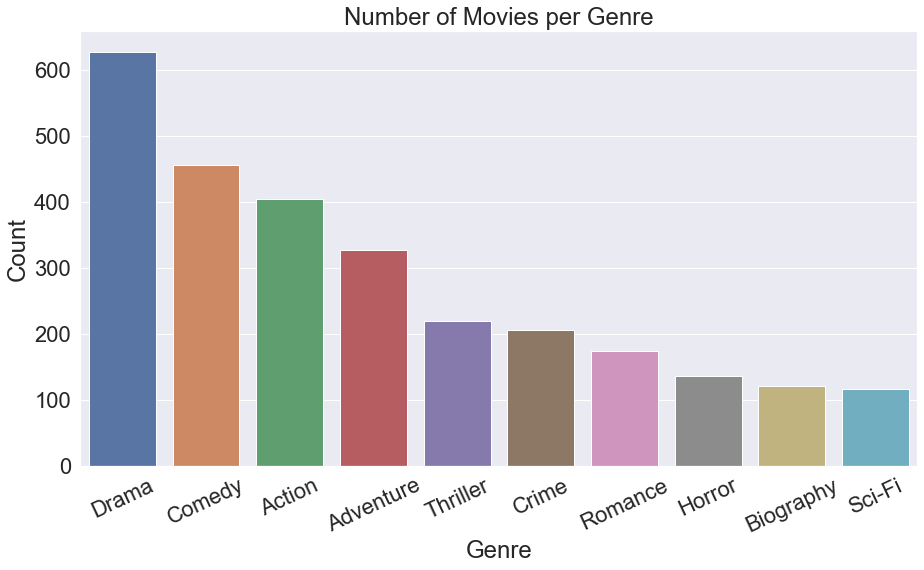

In [74]:
plt.figure(figsize = (15,8))

# plot top 10 genres
genre_barplot = sns.barplot(data=genre_bar_data[:10], x='Genre', y='Count')
genre_barplot.set_title('Number of Movies per Genre')
plt.xticks(rotation=25)
plt.savefig('genre_barplot.png', bbox_inches='tight');

Now that I have the movie count for each genre, I will examine the statistics for each genre. I will:

- find the .describe() info by genre and merge them into one dataframe
- examine the key metrics by genre
- plot the relevant data

In [75]:
# allows for efficient merging of dataframes
from functools import reduce

In [76]:
def merge_dummy_stats(dummy_df, main_df, key_features):
    '''
    Will create a .describe() dataframe for each dummy variable and merge them all into one dataframe.
    -
    Input:
        dummy_df: dataframe with all dummy variables
        main_df: dataframe with the features and metrics you wish to analyze. Must include the dummy variables from dummy_df.
        key_features: the features that will be included in the .describe() dataframe
    -
    Output:
        dataframe with .describe() stats of the key features grouped by each individual dummy variable
    '''
    df_list = []
    
    for column in dummy_df.columns.values.tolist():
        # sort the main_df by each individual dummy variable and get the .describe() stats for key features
        column_df = main_df.groupby(column)[key_features].describe().T
        # clean column names for improved readability
        column_df.columns.name = 'Genre'
        column_df = column_df.rename(columns={1:column}).drop(columns=0)
        # add each individual dataframe to the list
        df_list.append(column_df)
    
    # merge all dataframes together
    df_merged = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True), df_list)
    
    return df_merged

In [77]:
key_features = ['avg_rating', 'production_budget', 'worldwide_gross']

# drop 'genre_count' column so dataframe only include dummy variables
dummy_movie_data = merge_dummy_stats(genre_data.drop('genre_count', axis=1), full_movie_data, key_features)
dummy_movie_data

Genre                          Action     Adventure     Animation  \
avg_rating        count  4.040000e+02  3.270000e+02  9.300000e+01   
                  mean   6.412129e+00  6.491131e+00  6.653763e+00   
                  std    8.723070e-01  9.066968e-01  9.440384e-01   
                  min    3.100000e+00  3.200000e+00  3.200000e+00   
                  25%    5.800000e+00  5.900000e+00  6.200000e+00   
                  50%    6.450000e+00  6.500000e+00  6.700000e+00   
                  75%    7.000000e+00  7.100000e+00  7.300000e+00   
                  max    8.800000e+00  8.800000e+00  8.400000e+00   
production_budget count  4.040000e+02  3.270000e+02  9.300000e+01   
                  mean   8.520307e+07  1.104982e+08  1.028548e+08   
                  std    6.885372e+07  7.087257e+07  5.435734e+07   
                  min    1.900000e+05  1.800000e+06  8.000000e+06   
                  25%    3.112500e+07  5.000000e+07  6.000000e+07   
                  50%    6.500000e+07  1.050000e+08  9.000000e+07   
                  75%    1.300000e+08  1.600000e+08  1.450000e+08   
                  max    4.106000e+08  4.106000e+08  2.600000e+08   
worldwide_gross   count  4.040000e+02  3.270000e+02  9.300000e+01   
                  mean   2.614114e+08  3.709756e+08  4.085196e+08   
                  std    3.075846e+08  3.427220e+08  3.098291e+08   
                  min    1.180000e+04  1.180000e+04  5.706168e+06   
                  25%    5.363479e+07  1.065098e+08  1.413443e+08   
                  50%    1.484000e+08  2.683145e+08  3.485475e+08   
                  75%    3.440750e+08  5.446500e+08  5.622000e+08   
                  max    2.048134e+09  2.048134e+09  1.276400e+09   

Genre                       Biography        Comedy         Crime  \
avg_rating        count  1.210000e+02  4.550000e+02  2.050000e+02   
                  mean   7.068595e+00  6.303516e+00  6.488293e+00   
                  std    6.580315e-01  8.959950e-01  8.256664e-01   
                  min    4.800000e+00  3.200000e+00  3.800000e+00   
                  25%    6.700000e+00  5.800000e+00  6.100000e+00   
                  50%    7.100000e+00  6.300000e+00  6.500000e+00   
                  75%    7.500000e+00  7.000000e+00  7.100000e+00   
                  max    8.500000e+00  8.800000e+00  8.300000e+00   
production_budget count  1.210000e+02  4.550000e+02  2.050000e+02   
                  mean   2.758901e+07  4.485075e+07  3.560176e+07   
                  std    2.194104e+07  4.344390e+07  3.069267e+07   
                  min    2.700000e+05  5.000000e+04  1.900000e+05   
                  25%    1.200000e+07  1.500000e+07  1.500000e+07   
                  50%    2.000000e+07  3.000000e+07  3.000000e+07   
                  75%    3.600000e+07  6.000000e+07  4.250000e+07   
                  max    1.350000e+08  2.600000e+08  2.500000e+08   
worldwide_gross   count  1.210000e+02  4.550000e+02  2.050000e+02   
                  mean   9.442902e+07  1.536380e+08  9.708357e+07   
                  std    1.309626e+08  2.066467e+08  1.570995e+08   
                  min    8.307000e+05  2.280000e+04  5.290000e+05   
                  25%    1.754964e+07  3.174258e+07  2.177600e+07   
                  50%    4.673473e+07  8.142499e+07  5.590991e+07   
                  75%    1.155921e+08  1.776000e+08  1.177296e+08   
                  max    9.036000e+08  1.276400e+09  1.518723e+09   

Genre                     Documentary         Drama        Family  \
avg_rating        count  1.400000e+01  6.270000e+02  7.700000e+01   
                  mean   6.264286e+00  6.670175e+00  6.107792e+00   
                  std    1.702309e+00  8.734752e-01  9.977298e-01   
                  min    1.600000e+00  3.100000e+00  3.800000e+00   
                  25%    5.925000e+00  6.200000e+00  5.500000e+00   
                  50%    6.650000e+00  6.700000e+00  6.300000e+00   
                  75%    7.300000e+00  7.300000e+00  6.900000e+00

To make sense of this data, I will look at the mean and median of the top 5 genres for each key feature

In [78]:
dummy_movie_data.loc[('avg_rating', 'mean')].nlargest(5)

Genre
History      7.111765
Biography    7.068595
Sport        6.865385
Musical      6.783333
Western      6.711111
Name: (avg_rating, mean), dtype: float64

In [79]:
dummy_movie_data.loc[('avg_rating', '50%')].nlargest(5)

Genre
History      7.20
Biography    7.10
Sport        7.05
Musical      6.80
Animation    6.70
Name: (avg_rating, 50%), dtype: float64

In [80]:
dummy_movie_data.loc[('production_budget', 'mean')].nlargest(5)

Genre
Adventure    1.104982e+08
Animation    1.028548e+08
Sci-Fi       1.006955e+08
Musical      9.621667e+07
Fantasy      9.193362e+07
Name: (production_budget, mean), dtype: float64

In [81]:
dummy_movie_data.loc[('production_budget', '50%')].nlargest(5)

Genre
Adventure    105000000.0
Sci-Fi       100000000.0
Animation     90000000.0
Musical       77000000.0
Fantasy       67750000.0
Name: (production_budget, 50%), dtype: float64

In [82]:
dummy_movie_data.loc[('worldwide_gross', 'mean')].nlargest(5)

Genre
Musical      4.877353e+08
Animation    4.085196e+08
Sci-Fi       3.712322e+08
Adventure    3.709756e+08
Fantasy      2.724362e+08
Name: (worldwide_gross, mean), dtype: float64

In [83]:
dummy_movie_data.loc[('worldwide_gross', '50%')].nlargest(5)

Genre
Animation    348547523.0
Adventure    268314513.0
Musical      262776337.5
Sci-Fi       259357408.0
Action       148400000.0
Name: (worldwide_gross, 50%), dtype: float64

Of the 5 most successful genres in terms of rating (History, Biography, Sport, Musical, Animation), only Musical and Animation appear on the list of highest production budget and worldwide gross. There is a lot of overlap between genres with the highest budget and gross, however, as expected from the earlier correlation between budget and revenue.

Let's look at those genres more closely.

In [84]:
top_genres = dummy_movie_data[['Action', 'Adventure', 'Animation','Musical', 'Fantasy', 'Sci-Fi']]
top_genres

Genre                          Action     Adventure     Animation  \
avg_rating        count  4.040000e+02  3.270000e+02  9.300000e+01   
                  mean   6.412129e+00  6.491131e+00  6.653763e+00   
                  std    8.723070e-01  9.066968e-01  9.440384e-01   
                  min    3.100000e+00  3.200000e+00  3.200000e+00   
                  25%    5.800000e+00  5.900000e+00  6.200000e+00   
                  50%    6.450000e+00  6.500000e+00  6.700000e+00   
                  75%    7.000000e+00  7.100000e+00  7.300000e+00   
                  max    8.800000e+00  8.800000e+00  8.400000e+00   
production_budget count  4.040000e+02  3.270000e+02  9.300000e+01   
                  mean   8.520307e+07  1.104982e+08  1.028548e+08   
                  std    6.885372e+07  7.087257e+07  5.435734e+07   
                  min    1.900000e+05  1.800000e+06  8.000000e+06   
                  25%    3.112500e+07  5.000000e+07  6.000000e+07   
                  50%    6.500000e+07  1.050000e+08  9.000000e+07   
                  75%    1.300000e+08  1.600000e+08  1.450000e+08   
                  max    4.106000e+08  4.106000e+08  2.600000e+08   
worldwide_gross   count  4.040000e+02  3.270000e+02  9.300000e+01   
                  mean   2.614114e+08  3.709756e+08  4.085196e+08   
                  std    3.075846e+08  3.427220e+08  3.098291e+08   
                  min    1.180000e+04  1.180000e+04  5.706168e+06   
                  25%    5.363479e+07  1.065098e+08  1.413443e+08   
                  50%    1.484000e+08  2.683145e+08  3.485475e+08   
                  75%    3.440750e+08  5.446500e+08  5.622000e+08   
                  max    2.048134e+09  2.048134e+09  1.276400e+09   

Genre                         Musical       Fantasy        Sci-Fi  
avg_rating        count  6.000000e+00  1.160000e+02  1.170000e+02  
                  mean   6.783333e+00  6.201724e+00  6.636752e+00  
                  std    6.242329e-01  8.688806e-01  8.832345e-01  
                  min    5.900000e+00  3.100000e+00  4.400000e+00  
                  25%    6.425000e+00  5.675000e+00  6.100000e+00  
                  50%    6.800000e+00  6.300000e+00  6.600000e+00  
                  75%    7.175000e+00  6.800000e+00  7.200000e+00  
                  max    7.600000e+00  7.900000e+00  8.800000e+00  
production_budget count  6.000000e+00  1.160000e+02  1.170000e+02  
                  mean   9.621667e+07  9.193362e+07  1.006955e+08  
                  std    7.085762e+07  7.961121e+07  7.871778e+07  
                  min    8.300000e+06  1.000000e+05  1.750000e+05  
                  25%    5.875000e+07  2.500000e+07  2.700000e+07  
                  50%    7.700000e+07  6.775000e+07  1.000000e+08  
                  75%    1.410000e+08  1.500000e+08  1.650000e+08  
                  max    2.000000e+08  4.106000e+08  3.306000e+08  
worldwide_gross   count  6.000000e+00  1.160000e+02  1.170000e+02  
                  mean   4.877353e+08  2.724362e+08  3.712322e+08  
                  std    5.337604e+08  3.222955e+08  3.925744e+08  
                  min    5.082747e+07  9.495300e+04  8.523990e+05  
                  25%    6.841212e+07  4.656951e+07  5.500000e+07  
                  50%    2.627763e+08  1.284696e+08  2.593574e+08  
                  75%    8.778750e+08  4.025635e+08  5.439000e+08  
                  max    1.263500e+09  1.272470e+09  2.048134e+09

In [85]:
top_genres = top_genres.T.reset_index()
top_genres

Genre avg_rating                                                    \
                  count      mean       std  min    25%   50%    75%  max   
0     Action      404.0  6.412129  0.872307  3.1  5.800  6.45  7.000  8.8   
1  Adventure      327.0  6.491131  0.906697  3.2  5.900  6.50  7.100  8.8   
2  Animation       93.0  6.653763  0.944038  3.2  6.200  6.70  7.300  8.4   
3    Musical        6.0  6.783333  0.624233  5.9  6.425  6.80  7.175  7.6   
4    Fantasy      116.0  6.201724  0.868881  3.1  5.675  6.30  6.800  7.9   
5     Sci-Fi      117.0  6.636752  0.883234  4.4  6.100  6.60  7.200  8.8   

  production_budget  ...                           worldwide_gross  \
              count  ...          75%          max           count   
0             404.0  ...  130000000.0  410600000.0           404.0   
1             327.0  ...  160000000.0  410600000.0           327.0   
2              93.0  ...  145000000.0  260000000.0            93.0   
3               6.0  ...  141000000.0  200000000.0             6.0   
4             116.0  ...  150000000.0  410600000.0           116.0   
5             117.0  ...  165000000.0  330600000.0           117.0   

                                                                      \
           mean           std         min           25%          50%   
0  2.614114e+08  3.075846e+08     11800.0  5.363479e+07  148400000.0   
1  3.709756e+08  3.427220e+08     11800.0  1.065098e+08  268314513.0   
2  4.085196e+08  3.098291e+08   5706168.0  1.413443e+08  348547523.0   
3  4.877353e+08  5.337604e+08  50827466.0  6.841212e+07  262776337.5   
4  2.724362e+08  3.222955e+08     94953.0  4.656951e+07  128469590.5   
5  3.712322e+08  3.925744e+08    852399.0  5.500000e+07  259357408.0   

                               
            75%           max  
0  3.440750e+08  2.048134e+09  
1  5.446500e+08  2.048134e+09  
2  5.622000e+08  1.276400e+09  
3  8.778750e+08  1.263500e+09  
4  4.025635e+08  1.272470e+09  
5  5.439000e+08  2.048134e+09  

[6 rows x 25 columns]

Because Musical only has 6 movies, and the high degree of variability between the genres, I will plot the median worldwide gross as opposed to the mean.

In [86]:
sorted_top_genres = top_genres.sort_values(('worldwide_gross', '50%'), ascending=False)

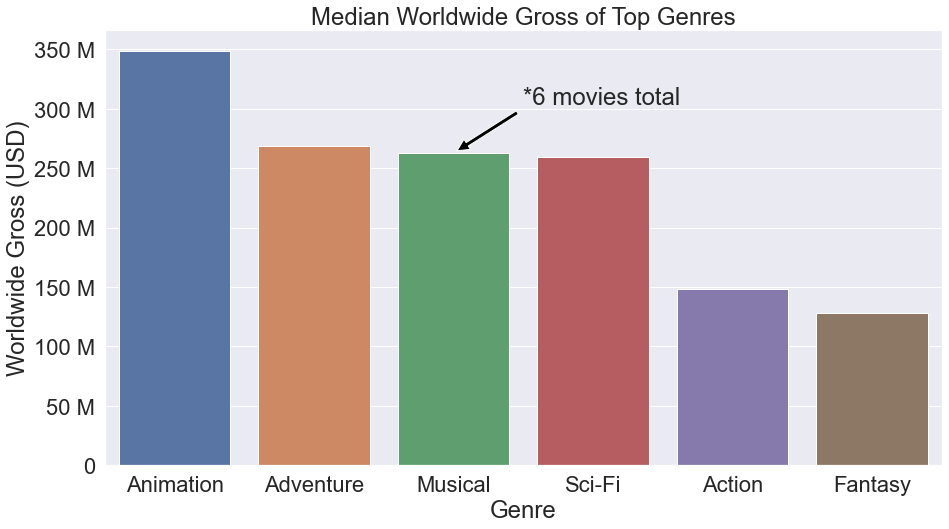

In [87]:
plt.figure(figsize=(15, 8))

top_genres_barplot = sns.barplot(data=sorted_top_genres, x='Genre', y=('worldwide_gross', '50%'))

top_genres_barplot.set(ylabel='Worldwide Gross (USD)',
                       title='Median Worldwide Gross of Top Genres')

# must manually set ticks before labeling to prevent display errors
top_genres_barplot.set_yticks(top_genres_barplot.get_yticks()[:-1])
top_genres_barplot.set_yticklabels(['0', '50 M', '100 M', '150 M', '200 M', '250 M', '300 M', '350 M'])

top_genres_barplot.annotate('*6 movies total',
                            xy=(2, 262776337.5),
                            xytext=(2.5, 300000000),
                            arrowprops = {'facecolor': 'black', 'shrink': 0.05},
                            horizontalalignment='left',
                            verticalalignment='bottom')
plt.savefig('top_genres_barplot.png', bbox_inches='tight');

Key Takeaways:
- Muscial only has 6 movies total, so it is either too small to be considered reliable, or perhaps indicates a genre that is undersaturated in the market.
- Examining the worldwide gross mean shows that the 2 highest genres are Musical and Animation, but these are also the 2 smallest groups. For the median, Animation is the highest by a large amount.
- The standard deviation for all the genres is incredibly large, so there is a large amount of variance and the mean values will be less reliable.

### Director Analysis

I will examine the importance of directorial experience as compared to gross revenue by grouping the data by the number of movies each director has directed to date.

In [88]:
# group by num_movies_directed
director_data = movie_data.groupby('num_movies_directed')[key_features].describe().T
director_data

num_movies_directed                1             2             3   \
avg_rating        count  1.810000e+02  2.600000e+02  2.800000e+02   
                  mean   6.125967e+00  6.307692e+00  6.601429e+00   
                  std    9.228818e-01  9.264551e-01  8.478085e-01   
                  min    3.200000e+00  3.100000e+00  3.200000e+00   
                  25%    5.500000e+00  5.800000e+00  6.100000e+00   
                  50%    6.200000e+00  6.400000e+00  6.500000e+00   
                  75%    6.700000e+00  7.000000e+00  7.200000e+00   
                  max    8.400000e+00  8.200000e+00  8.800000e+00   
production_budget count  1.810000e+02  2.600000e+02  2.800000e+02   
                  mean   4.292164e+07  4.199635e+07  5.168544e+07   
                  std    5.009098e+07  4.747811e+07  6.199893e+07   
                  min    2.700000e+04  1.000000e+05  1.750000e+05   
                  25%    1.200000e+07  1.000000e+07  1.160000e+07   
                  50%    2.300000e+07  2.500000e+07  3.000000e+07   
                  75%    5.000000e+07  5.050000e+07  6.150000e+07   
                  max    2.100000e+08  2.750000e+08  4.106000e+08   
worldwide_gross   count  1.810000e+02  2.600000e+02  2.800000e+02   
                  mean   1.018198e+08  1.309577e+08  1.848534e+08   
                  std    1.527491e+08  2.016201e+08  2.642580e+08   
                  min    3.600000e+03  4.755200e+04  3.467000e+05   
                  25%    1.182698e+07  1.843403e+07  2.530982e+07   
                  50%    4.625576e+07  5.657277e+07  7.510000e+07   
                  75%    1.030393e+08  1.373000e+08  2.254750e+08   
                  max    8.576000e+08  1.276400e+09  1.405400e+09   

num_movies_directed                4             5             6   \
avg_rating        count  1.980000e+02  1.460000e+02  8.200000e+01   
                  mean   6.483333e+00  6.568493e+00  6.442683e+00   
                  std    9.316625e-01  1.014363e+00  8.459096e-01   
                  min    3.300000e+00  3.500000e+00  4.200000e+00   
                  25%    6.000000e+00  6.100000e+00  5.800000e+00   
                  50%    6.500000e+00  6.600000e+00  6.450000e+00   
                  75%    7.100000e+00  7.200000e+00  7.000000e+00   
                  max    8.500000e+00  8.800000e+00  8.100000e+00   
production_budget count  1.980000e+02  1.460000e+02  8.200000e+01   
                  mean   5.189773e+07  6.662068e+07  6.518232e+07   
                  std    5.590724e+07  6.497424e+07  6.222412e+07   
                  min    7.500000e+05  1.000000e+05  9.500000e+05   
                  25%    1.500000e+07  1.925000e+07  1.650000e+07   
                  50%    3.000000e+07  4.500000e+07  4.000000e+07   
                  75%    6.500000e+07  1.000000e+08  9.875000e+07   
                  max    2.500000e+08  3.000000e+08  2.170000e+08   
worldwide_gross   count  1.980000e+02  1.460000e+02  8.200000e+01   
                  mean   1.847799e+08  2.295657e+08  2.385539e+08   
                  std    2.558313e+08  2.945149e+08  3.310217e+08   
                  min    2.860000e+05  6.237500e+04  1.180000e+04   
                  25%    3.482427e+07  5.417500e+07  3.700926e+07   
                  50%    8.697254e+07  1.246000e+08  1.138000e+08   
                  75%    2.140544e+08  2.620968e+08  2.442869e+08   
                  max    1.648855e+09  2.048134e+09  1.272470e+09   

num_movies_directed                7             8             9   \
avg_rating        count  5.300000e+01  2.200000e+01  2.200000e+01   
                  mean   6.635849e+00  6.550000e+00  6.768182e+00   
                  std    8.523935e-01  8.672617e-01  5.842263e-01   
                  min    4.400000e+00  4.200000e+00  5.800000e+00   
                  25%    6.200000e+00  6.125000e+00  6.300000e+00   
                  50%    6.600000e+00  6.650000e+00  6.750000e+00   
                  75%    7.200000e+00  7.150000e+00  7.275000e+00

Beacause the sample size is so small for num_movies_directed above 7, I will cut the higher categories, as they are very susceptible to outliers and will be unreliable.

In [89]:
# only include movies with directors with 7 or less movies directed
director_df = movie_data[movie_data['num_movies_directed'] <= 7]

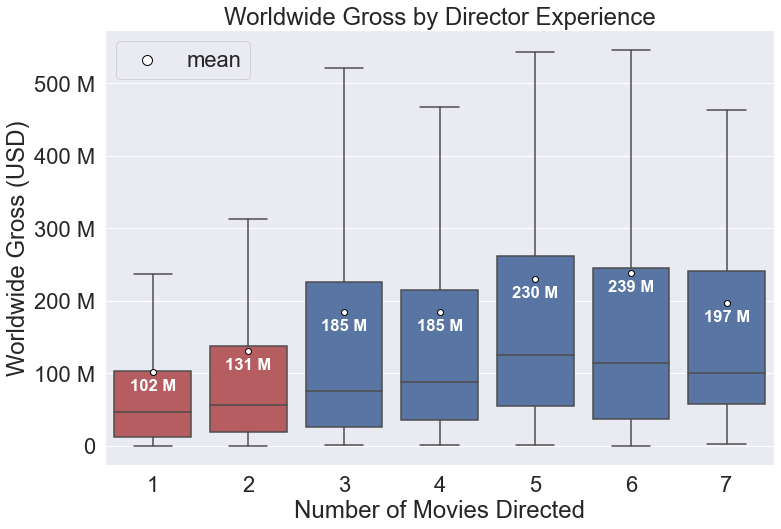

In [90]:
plt.figure(figsize = (12,8))
# custom color palette to highlight key categories
color_pal = {count: "b" if count >= 3 else "r" for count in director_df['num_movies_directed'].unique()}

director_graph = sns.boxplot(data=director_df,
                             x='num_movies_directed',
                             y='worldwide_gross',
                             palette=color_pal,
                             # omit outliers
                             showfliers=False,
                             #include means
                             showmeans=True,
                             meanprops={"marker":"o", "markerfacecolor":"white", 'markeredgecolor':'black'})

director_graph.set(xlabel='Number of Movies Directed',
                   ylabel='Worldwide Gross (USD)',
                   title='Worldwide Gross by Director Experience')

director_graph.set_yticks(director_graph.get_yticks()[1:-1])
director_graph.set_yticklabels(['0', '100 M', '200 M', '300 M', '400 M', '500 M'])

# include mean value as text for each category
means = director_df.groupby(['num_movies_directed'])['worldwide_gross'].mean()
vertical_offset = director_df['worldwide_gross'].mean() * 0.15

for xtick in director_graph.get_xticks():
    director_graph.text(x=xtick,
                        # ignore first xtick set at 0
                        y=means[xtick+1] - vertical_offset,
                        # change mean format to match y-axis
                        s=(str(round(means[xtick+1] * 0.000001)) + ' M'),
                        horizontalalignment='center',
                        size='x-small',
                        color='w',
                        weight='semibold')

# plot empty scatter graph to include mean marker in legend
plt.scatter(x=[], y=[], s=100, marker='o', color='white', edgecolor='black', label='mean')
plt.legend()
plt.savefig('director_graph.png', bbox_inches='tight');

As indicated by the graph above, a director with more experience is generally more likely to make a profitable movie, at least up to a certain point. Though there is a lot of variablity, and this should not be the only consideration, number of movies directed does appear to be useful as an exploratory metric.

## Results
***
I examined data on movies from 2010-2018 from a variety of sources. After cleaning and preparing the data, I had a total dataset of 1,271 movies.

### Success Metric
The measurement for success was gross revenue. This was chosen over ROI for a few reasons. First, ROI correlated very strongly (r=.984) with gross revenue, so it was preferable to use gross revenue and avoid diluting the data unecessarily. Second, I only had the production budget data. The data did not include costs such as marketing and distribution, so any ROI metric I might use would be incomplete.

### Key Features
After some initial data analysis, I decided to use production budget, genre, and director experience as key features for determining gross revenue.

#### Production Budget
Production budget had the highest correlation to gross revenue of all available features (r=.774). This correlation is not strong enough to be used as a stand-alone metric, but it does provide some insight. In general, movies with a higher production budget earn a higher gross revenue.

#### Genre Analysis
For the genre analysis, I examined both total genre count and individual genre performance. For genre count, the data showed a much higher mean and median gross revenue for movies with at least 3 genres. This suggests that movies with a broader appeal and a bigger reach will earn significantly more revenue than movies with a more narrow focus.

When examining individual genres, there was a great deal of overlap between the genres with the highest production budgets and gross revenues. The genres with the highest median gross revenue were, in order: Animation, Adventure, Musical, Sci-Fi, Action, Fantasy. However, the variance and number of data points for each genre was wildly inconsistent. In particular, Musical only consisted of 6 movies. This indicates that the data is either unreliable, or that the genre is undersaturated in the current market, which is something that could be capitalized on. 

#### Director Experience
Directorial experience was defined by the total number of movies a director had directed at the time of data collection. When examining the relationship between directorial experience and gross revenue, the data was ultimately inconclusive. It does demonstrate a general overall increase in average gross revenue as the number of movies directed increases, but there is also a lot of overlap in the graph. The data does suggest, though, that a director with between 3-7 movies directed does have a much better chance at creating a movie with a higher gross revenue than a director with 1-2 movies directed.

### Recommendation
In conclusion, the data suggests that in order to earn a higher gross revenue, Microsoft should focus on movies with:
 - higher production budgets
 - broad appeal (multiple genres)
 - proven directors with past box office success (2-5 previous movies directed)

### Next Steps
There were several limitations and shortcomings that would need to be rectified in future analysis:

The dataset does not include data from the most recent years. However, due to the ongoing global pandemic, and the resulting industry upheaval, this could mean the data is more consistent with a typical box office environment.

The dataset does not include financial information on movies released on streaming services. This data is hard to come by, as the revenue structure is very different and much of the specific information is not publicly available. But given the rise of streaming services in the movie industry, it is something that Microsoft needs to consider.

The dataset does not include consistent data on revenue and production budget, which limited the number of movies that could be analyzed. Ideally, more data collection should be done to improve the accuracy of the data.

The genre analysis examined individual genres, but did not consider what types of genres are most often paired together. It is possible that certain combinations of genres are more likely to have success than others.

Directorial analysis only considered the total number of movies directed at the time of data collection. Ideally, the analysis should include data on the number of movies a director had made prior to the release of each specific movie, as well as analysis on the likelihood of a director's financial success based on the performance of their past movies, but this would also require a great deal more data collection and preparation.

In addition, directorial analysis should include verifying that a directors previous experience matches the other recommended criteria: higher production budgets and movies with broad appeal.